1. Processar Dados para Extrair Padrões

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline
df = pd.read_csv('../crime_segunda_area.csv')

# Análise Exploratória (EDA)

In [23]:
display(df)

,latitude,longitude,data,hora,tipo_crime,bairro,rua,tipo_dia,ano,nome,cpf,idade,email,telefone,endereco,__ERR0O0__,null
0,-15.825598,-47.902706,2020-05-27,03:59,furto,Asa Sul,L2 Sul,dia_normal,2020,Daniela Campos,694.730.125-43,19.0,cardososamuel@example.net,21 7632 8636,"L2 Sul Edifício Omega, Unidade 154",ERRO_404,NaN
1,-15.821990,-47.901067,2021-03-27,15:37,vandalismo,Asa Sul,W3 Sul,final_semana,2021,Bella da Cruz,154.702.963-34,18.0,costaluan@example.net,+55 (084) 2789-7513,"W3 Sul Edifício Prime, Unidade 226",ERRO_404,NaN
2,-15.822031,-47.923438,2020-08-06,20:56,roubo,Asa Sul,L2 Sul,dia_normal,2020,Dr. Nathan Alves,203.678.514-07,22.0,marianapimenta@example.org,+55 21 9629 8280,"L2 Sul Bloco A, Ap 711",ERRO_404,NaN
3,-15.829660,-47.907970,2021-11-28,19:37,vandalismo,Asa Sul,Eixo L Sul,dia_normal,2021,Benicio Novaes,409.532.867-38,NaN,vinicius72@example.com,31 3377-6721,NaN,ERRO_404,NaN
4,-15.825107,-47.905998,2020-01-18,22:29,homicídio,Asa Sul,Eixo L Sul,final_semana,2020,João Ferreira,069.527.413-99,32.0,NaN,+55 71 9548-7350,"Eixo L Sul Bloco B, Ap 840",ERRO_404,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-15.817497,-47.896850,2023-08-11,02:16,feminicídio,Asa Sul,Novo Setor 1,final_semana,2023,Luigi Souza,408.273.561-53,60.0,nascimentoleonardo@example.com,81 3393 7596,"Novo Setor 1 Edifício Delta, Unidade 240",ERRO_404,NaN
29996,-15.813182,-47.909225,2020-07-22,00:18,furto,Asa Sul,W3 Sul,dia_normal,2020,Hellena Pimenta,205.893.417-23,55.0,yan50@example.com,+55 (061) 9740 3116,"W3 Sul Lote 10, Sala 117",ERRO_404,NaN
29997,-15.830887,-47.927924,2020-03-27,07:52,tráfico,Asa Sul,L2 Sul,final_semana,2020,Melissa Melo,759.802.631-95,18.0,dpastor@example.com,+55 31 6585-5384,"L2 Sul Edifício Prime, Unidade 229",ERRO_404,NaN
29998,-15.798809,-47.889363,2021-09-27,22:07,furto,Asa Sul,Novo Setor 1,dia_normal,2021,Carolina Sousa,059.872.134-79,68.0,alicemontenegro@example.com,0300-162-2791,"Novo Setor 1 Lote 9, Sala 223",ERRO_404,NaN


### Inspeção inicial

In [24]:
print(f"Dimensões do DataFrame\n\n{df.shape}")
print("\nHEAD\n",df.head())
print("\nDESCRIBE\n",df.describe(include="all"))

Dimensões do DataFrame

(30000, 17)

HEAD
     latitude  longitude        data   hora  tipo_crime   bairro         rua  \
0 -15.825598 -47.902706  2020-05-27  03:59       furto  Asa Sul      L2 Sul   
1 -15.821990 -47.901067  2021-03-27  15:37  vandalismo  Asa Sul      W3 Sul   
2 -15.822031 -47.923438  2020-08-06  20:56       roubo  Asa Sul      L2 Sul   
3 -15.829660 -47.907970  2021-11-28  19:37  vandalismo  Asa Sul  Eixo L Sul   
4 -15.825107 -47.905998  2020-01-18  22:29   homicídio  Asa Sul  Eixo L Sul   

       tipo_dia   ano              nome             cpf  idade  \
0    dia_normal  2020    Daniela Campos  694.730.125-43   19.0   
1  final_semana  2021     Bella da Cruz  154.702.963-34   18.0   
2    dia_normal  2020  Dr. Nathan Alves  203.678.514-07   22.0   
3    dia_normal  2021    Benicio Novaes  409.532.867-38    NaN   
4  final_semana  2020     João Ferreira  069.527.413-99   32.0   

                        email             telefone  \
0   cardososamuel@example.net  

### Verificando dados Nulos

In [25]:
print(df.isnull().sum())

latitude          0
longitude         0
data              0
hora              0
tipo_crime      300
bairro            0
rua               0
tipo_dia          0
ano               0
nome            886
cpf               0
idade          2320
email          6105
telefone       2115
endereco       2755
__ERR0O0__        0
null          30000
dtype: int64


### Tratando coluna de Erro e null

In [ ]:
df = df.drop(columns=["__ERR0O0__", "null"])
print(df)

KeyError: "['__ERRO__'] not found in axis"

# Visualização de Dados

### Mapa de Correlação

## a) Crimes por Horário


In [ ]:

# Contar crimes por hora
df['hora'] = pd.to_datetime(df['hora']).dt.hour
crimes_por_hora = df.groupby('hora').size().reset_index(name='contagem')
crimes_por_hora = crimes_por_hora.sort_values(by='contagem', ascending=False)
print("Horários com mais crimes:")
print(crimes_por_hora.head(24))

C:\Users\migue\AppData\Local\Temp\ipykernel_41768\2489483636.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hora'] = pd.to_datetime(df['hora']).dt.hour


Horários com mais crimes:
    hora  contagem
22    22      2401
23    23      2380
21    21      2302
0      0      2256
20    20      2149
1      1      2123
19    19      1878
2      2      1800
18    18      1588
3      3      1542
17    17      1376
4      4      1294
5      5      1080
16    16       985
15    15       807
6      6       797
7      7       599
14    14       569
13    13       452
8      8       436
12    12       320
9      9       316
10    10       279
11    11       271


### Quantidade de Crimes Por Hora

In [ ]:

# Contar quantos crimes ocorreram em cada hora
crimes_por_hora = df['hora'].value_counts().sort_index()
# Definir cores para destacar 21h–23h e 0h–2h
colors = ['orange' if h >= 19 or h < 4 else 'skyblue' for h in crimes_por_hora.index]

# Plotar com cores personalizadas
plt.figure(figsize=(12, 6))
sns.barplot(x=crimes_por_hora.index, y=crimes_por_hora.values, palette=colors)
plt.title("Quantidade de Crimes por Hora do Dia ", fontsize=16)
plt.xlabel("Hora do Dia", fontsize=14)
plt.ylabel("Quantidade de Crimes", fontsize=14)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('crimes_por_hora_destacado.png', dpi=300)
plt.show()

NameError: name 'plt' is not defined

b) Crimes por Localização


In [ ]:
# Contar crimes por rua
crimes_por_rua = df.groupby('rua').size().reset_index(name='contagem')
crimes_por_rua = crimes_por_rua.sort_values(by='contagem', ascending=False)
print("Ruas com mais crimes:")
print(crimes_por_rua.head(3))

Ruas com mais crimes:
            rua  contagem
0    Eixo L Sul      7593
2  Novo Setor 1      7555
1        L2 Sul      7483


    c) Crimes por Tipo


In [ ]:
# Contar crimes por tipo
crimes_por_tipo = df.groupby('tipo_crime').size().reset_index(name='contagem')
crimes_por_tipo = crimes_por_tipo.sort_values(by='contagem', ascending=False)
print("Tipos de crime mais comuns:")
print(crimes_por_tipo.head(3))

Tipos de crime mais comuns:
   tipo_crime  contagem
1       furto      8175
3       roubo      6755
5  vandalismo      5568


#### Gráfico de Tipos de Crime


Quantidade total de crimes: 30000

Principais tipos de crimes:
    tipo_crime  quantidade  porcentagem
0        furto        8175    27.522472
1        roubo        6755    22.741811
2   vandalismo        5568    18.745581
3      tráfico        4760    16.025317
4    homicídio        2906     9.783524
5  feminicídio        1539     5.181295


C:\Users\migue\AppData\Local\Temp\ipykernel_41768\3331100647.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=frequencia_crimes_total, x='quantidade', y='tipo_crime', palette='viridis')


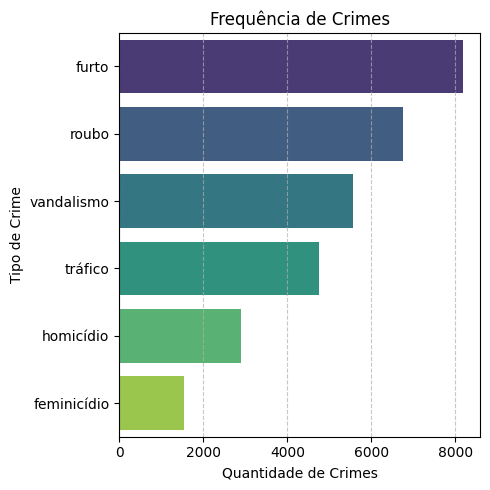

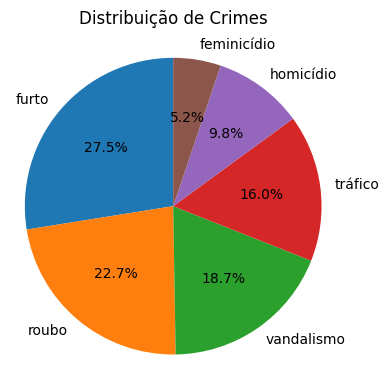

In [ ]:
# Verificar se há registros
print("\nQuantidade total de crimes:", len(df))

# Contar frequência de cada tipo de crime noturno
frequencia_crimes_total = df['tipo_crime'].value_counts().reset_index()
frequencia_crimes_total.columns = ['tipo_crime', 'quantidade']

# Calcular porcentagem
total_crimes = frequencia_crimes_total['quantidade'].sum()
frequencia_crimes_total['porcentagem'] = (frequencia_crimes_total['quantidade'] / total_crimes) * 100

# Exibir resultados
print("\nPrincipais tipos de crimes:")
print(frequencia_crimes_total)

# Gráfico de barras
plt.figure(figsize=(5, 5))
sns.barplot(data=frequencia_crimes_total, x='quantidade', y='tipo_crime', palette='viridis')
plt.title('Frequência de Crimes')
plt.xlabel('Quantidade de Crimes')
plt.ylabel('Tipo de Crime')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Gráfico de pizza
plt.figure(figsize=(4, 4))
plt.pie(frequencia_crimes_total['quantidade'], labels=frequencia_crimes_total['tipo_crime'], autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Crimes')
plt.axis('equal')
plt.tight_layout()
plt.show()

2. Criar um Modelo de Priorização Simples


a) Calcular Risco por Região


In [ ]:
# Definir pesos por tipo de crime
pesos = {
    'feminicídio': 5,
    'homicídio': 5,
    'tráfico': 4,
    'roubo': 3,
    'furto': 2,
    'vandalismo': 1
}

# Adicionar coluna de peso
df['peso'] = df['tipo_crime'].map(pesos)

# Calcular pontuação de risco por rua
risco_por_rua = df.groupby('rua')['peso'].sum().reset_index(name='risco_total')
risco_por_rua = risco_por_rua.sort_values(by='risco_total', ascending=False)
print("Ruas com maior risco:")
print(risco_por_rua.head(3))

Ruas com maior risco:
            rua  risco_total
1        L2 Sul      25358.0
3        W3 Sul      21742.0
2  Novo Setor 1      18459.0


b) Identificar Horários de Risco


In [ ]:
# Filtrar crimes graves (ex: homicídio, tráfico)
crimes_graves = df[df['tipo_crime'].isin(['homicídio', 'tráfico'])]

# Contar crimes graves por hora
horarios_risco = crimes_graves.groupby('hora').size().reset_index(name='contagem')
horarios_risco = horarios_risco.sort_values(by='contagem', ascending=False)
print("Horários com mais crimes graves:")
print(horarios_risco.head(3))

Horários com mais crimes graves:
    hora  contagem
20    20       606
23    23       559
22    22       557



Quantidade total de crimes: 30000
Quantidade de crimes noturnos: 21205

Principais tipos de crimes noturnos:
    tipo_crime  quantidade  porcentagem
0        furto        5832    27.779366
1        roubo        4845    23.078022
2   vandalismo        4010    19.100695
3      tráfico        3210    15.290083
4    homicídio        1987     9.464609
5  feminicídio        1110     5.287225


C:\Users\migue\AppData\Local\Temp\ipykernel_41768\4268296815.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=frequencia_crimes, x='quantidade', y='tipo_crime', palette='viridis')


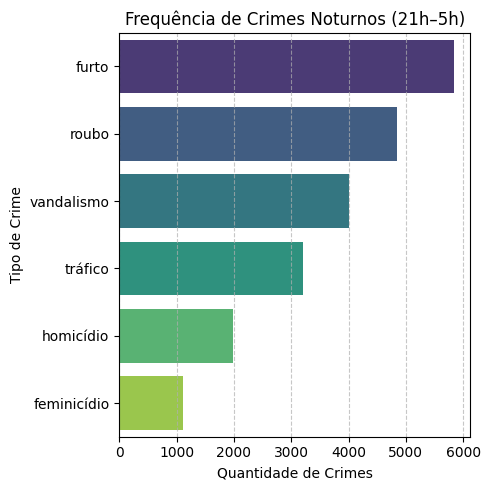

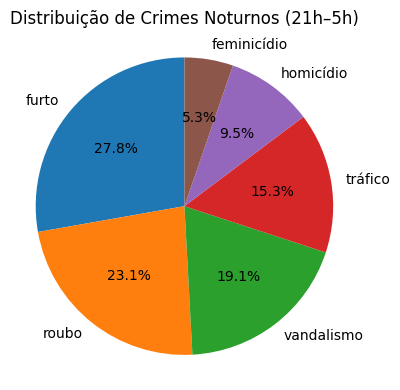

In [ ]:

# Filtrar crimes noturnos (21h–23h e 00h–5h)
crimes_noturnos = df[(df['hora'] >= 19) | (df['hora'] <= 5)]

# Verificar se há registros noturnos
print("\nQuantidade total de crimes:", len(df))
print("Quantidade de crimes noturnos:", len(crimes_noturnos))

# Contar frequência de cada tipo de crime noturno
frequencia_crimes = crimes_noturnos['tipo_crime'].value_counts().reset_index()
frequencia_crimes.columns = ['tipo_crime', 'quantidade']

# Calcular porcentagem
total_crimes_noturnos = frequencia_crimes['quantidade'].sum()
frequencia_crimes['porcentagem'] = (frequencia_crimes['quantidade'] / total_crimes_noturnos) * 100

# Exibir resultados
print("\nPrincipais tipos de crimes noturnos:")
print(frequencia_crimes)

# Gráfico de barras
plt.figure(figsize=(5, 5))
sns.barplot(data=frequencia_crimes, x='quantidade', y='tipo_crime', palette='viridis')
plt.title('Frequência de Crimes Noturnos (21h–5h)')
plt.xlabel('Quantidade de Crimes')
plt.ylabel('Tipo de Crime')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Gráfico de pizza
plt.figure(figsize=(4, 4))
plt.pie(frequencia_crimes['quantidade'], labels=frequencia_crimes['tipo_crime'], autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Crimes Noturnos (21h–5h)')
plt.axis('equal')  # Para manter o círculo redondo
plt.tight_layout()
plt.show()

## Vitimas Por Idade

C:\Users\migue\AppData\Local\Temp\ipykernel_41768\640978022.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=frequencia_idades, x='quantidade', y='faixa_etaria', palette='viridis')


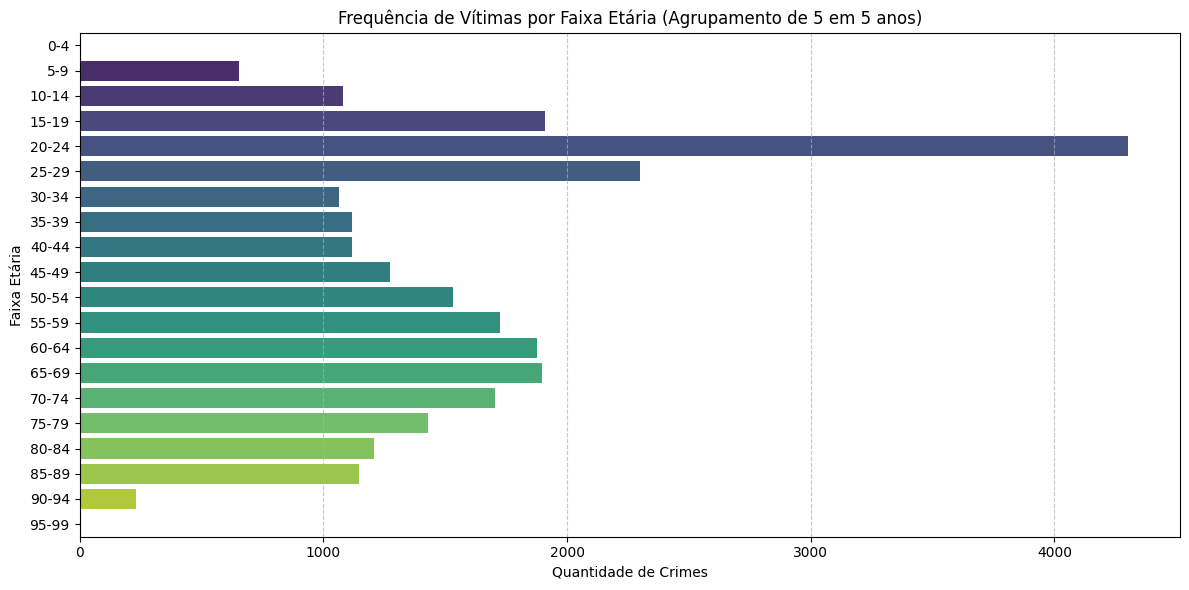

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Limpar NaN e converter idade para inteiro
df_idade = df['idade'].dropna().astype(int)

# Definir intervalos de 5 anos
bins = range(0, 101, 5)  # 0-5, 5-10, 10-15, ..., 95-100
labels = [f"{i}-{i+4}" for i in bins[:-1]]

# Agrupar idades
binned_ages = pd.cut(df_idade, bins=bins, labels=labels, right=False)

# Contar frequência por grupo de idade
frequencia_idades = binned_ages.value_counts().sort_index()
frequencia_idades = frequencia_idades.reset_index()
frequencia_idades.columns = ['faixa_etaria', 'quantidade']

# Calcular porcentagem
total = frequencia_idades['quantidade'].sum()
frequencia_idades['porcentagem'] = (frequencia_idades['quantidade'] / total) * 100

# Plotar gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=frequencia_idades, x='quantidade', y='faixa_etaria', palette='viridis')
plt.title("Frequência de Vítimas por Faixa Etária (Agrupamento de 5 em 5 anos)")
plt.xlabel("Quantidade de Crimes")
plt.ylabel("Faixa Etária")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

## Mapas Folium Para Visualizar o Mapa de calor


In [ ]:
import pandas as pd
import numpy as np
import folium
from folium.plugins import HeatMap, MarkerCluster

# Carregar os dados
df = pd.read_csv('../crime_segunda_area.csv')

# Definir peso por tipo de crime
peso_crime = {
    'furto': 2,
    'roubo': 3,
    'vandalismo': 1,
    'tráfico': 4,
    'homicídio': 5,
    'feminicídio': 5
}
df['peso'] = df['tipo_crime'].map(peso_crime)

# Risco por rua
risco_por_rua = df.groupby('rua').agg(
    total_crimes=('tipo_crime', 'count'),
    risco_total=('peso', 'sum')
).reset_index()
risco_por_rua['risco_medio'] = risco_por_rua['risco_total'] / risco_por_rua['total_crimes']

# Mapa interativo com marcadores e heatmap
mapa = folium.Map(location=[-15.7942, -47.8825], zoom_start=14, tiles='CartoDB positron')

# Cluster de marcadores
marker_cluster = MarkerCluster().add_to(mapa)
for _, row in df.sample(n=500).iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['rua']} - {row['tipo_crime']}",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(marker_cluster)

# Heatmap (usar amostra menor para performance)
heat_data = [[row['latitude'], row['longitude']] for _, row in df.sample(n=500).iterrows()]
HeatMap(heat_data, radius=15, blur=20, max_zoom=16).add_to(mapa)

# Marcadores dos setores com mais risco
risco_top = risco_por_rua.sort_values(by='risco_total', ascending=False).head(5)
for _, row in risco_top.iterrows():
    # Filtrar coordenadas médias da rua
    lat_media = df[df['rua'] == row['rua']]['latitude'].mean()
    lon_media = df[df['rua'] == row['rua']]['longitude'].mean()
    
    # Validar coordenadas antes de adicionar ao mapa
    if pd.notna(lat_media) and pd.notna(lon_media):
        folium.Marker(
            location=[lat_media, lon_media],
            popup=f"{row['rua']} (Risco: {row['risco_total']})",
            icon=folium.Icon(color='darkred', icon='warning-sign')
        ).add_to(mapa)

# Salvar o mapa
mapa.save('mapa_calor.html')
print("✅ Mapa salvo como 'mapa_calor.html'")

✅ Mapa salvo como 'mapa_calor.html'


## Mapa de Calor por hora

In [ ]:
import pandas as pd
import numpy as np
import folium
from folium.plugins import HeatMap, MarkerCluster
from sklearn.cluster import DBSCAN

# Carregar os dados
df = pd.read_csv('../crime_segunda_area.csv')

# Converter hora para numérica (se ainda não estiver)
df['hora'] = pd.to_datetime(df['hora'], format='%H:%M', errors='coerce').dt.hour

# Loop por cada hora do dia (0–23)
for hora in range(24):
    # Filtrar dados para a hora atual
    df_hora = df[df['hora'] == hora]
    
    # Agrupar pontos próximos usando DBSCAN (epsilon=0.005 graus ≈ 500 metros)
    coords = df_hora[['latitude', 'longitude']].values
    dbscan = DBSCAN(eps=0.005, min_samples=5).fit(coords)
    labels = dbscan.labels_
    
    # Calcular centroides dos clusters
    unique_labels = set(labels)
    clusters = []
    for label in unique_labels:
        if label == -1:
            continue  # Ignorar outliers
        cluster = coords[labels == label]
        centroid = (np.mean(cluster[:, 0]), np.mean(cluster[:, 1]))
        count = len(cluster)
        clusters.append({'centroid': centroid, 'count': count})
    
    # Selecionar os 3 clusters com mais crimes
    top_clusters = sorted(clusters, key=lambda x: -x['count'])[:3]
    
    # Criar mapa base
    mapa = folium.Map(location=[-15.7942, -47.8825], zoom_start=14, tiles='CartoDB positron')
    
    # Cluster de marcadores (amostra de 500 registros para performance)
    marker_cluster = MarkerCluster().add_to(mapa)
    for _, row in df_hora.sample(n=100).iterrows():
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=f"{row['rua']} - {row['tipo_crime']}",
            icon=folium.Icon(color='red', icon='info-sign')
        ).add_to(marker_cluster)
    
    # Heatmap com ponderação pelo 'peso' do crime (opcional)
    heat_data = [[row['latitude'], row['longitude']] for _, row in df_hora.iterrows()]
    HeatMap(heat_data, radius=15, blur=20, max_zoom=16).add_to(mapa)
    
    # Adicionar marcadores dos 3 clusters com maior incidência
    colors = ['darkred', 'orange', 'blue']
    for i, cluster in enumerate(top_clusters):
        lat, lon = cluster['centroid']
        count = cluster['count']
        
        folium.CircleMarker(
            location=[lat, lon],
            radius=10,
            color=colors[i % 3],
            fill=True,
            fill_color=colors[i % 3],
            popup=f"Máximo de {count} crimes nesse ponto"
        ).add_to(mapa)
    
    # Adicionar legenda da hora
    folium.map.LayerControl('bottomleft').add_to(mapa)
    folium.Marker(
        location=[-15.7942, -47.8825],
        icon=folium.DivIcon(html=f'<div style="font-weight: bold; color: red;">{hora}h</div>')
    ).add_to(mapa)
    
    # Salvar mapa da hora atual
    filename = f'mapa_calor_{hora:02d}.html'
    mapa.save(filename)
    print(f"✅ Mapa da {hora}h salvo como '{filename}'")

✅ Mapa da 0h salvo como 'mapa_calor_00.html'
✅ Mapa da 1h salvo como 'mapa_calor_01.html'
✅ Mapa da 2h salvo como 'mapa_calor_02.html'
✅ Mapa da 3h salvo como 'mapa_calor_03.html'
✅ Mapa da 4h salvo como 'mapa_calor_04.html'
✅ Mapa da 5h salvo como 'mapa_calor_05.html'
✅ Mapa da 6h salvo como 'mapa_calor_06.html'
✅ Mapa da 7h salvo como 'mapa_calor_07.html'
✅ Mapa da 8h salvo como 'mapa_calor_08.html'
✅ Mapa da 9h salvo como 'mapa_calor_09.html'
✅ Mapa da 10h salvo como 'mapa_calor_10.html'
✅ Mapa da 11h salvo como 'mapa_calor_11.html'
✅ Mapa da 12h salvo como 'mapa_calor_12.html'
✅ Mapa da 13h salvo como 'mapa_calor_13.html'
✅ Mapa da 14h salvo como 'mapa_calor_14.html'
✅ Mapa da 15h salvo como 'mapa_calor_15.html'
✅ Mapa da 16h salvo como 'mapa_calor_16.html'
✅ Mapa da 17h salvo como 'mapa_calor_17.html'
✅ Mapa da 18h salvo como 'mapa_calor_18.html'
✅ Mapa da 19h salvo como 'mapa_calor_19.html'
✅ Mapa da 20h salvo como 'mapa_calor_20.html'
✅ Mapa da 21h salvo como 'mapa_calor_21.html

Nova area


In [ ]:
import pandas as pd
import numpy as np
import folium
from folium.plugins import HeatMap, MarkerCluster

# Carregar os dados
df = pd.read_csv('../crime_segunda_area.csv')

# Definir peso por tipo de crime
peso_crime = {
    'furto': 2,
    'roubo': 3,
    'vandalismo': 1,
    'tráfico': 4,
    'homicídio': 5,
    'feminicídio': 5
}
df['peso'] = df['tipo_crime'].map(peso_crime)

# Risco por rua
risco_por_rua = df.groupby('rua').agg(
    total_crimes=('tipo_crime', 'count'),
    risco_total=('peso', 'sum')
).reset_index()
risco_por_rua['risco_medio'] = risco_por_rua['risco_total'] / risco_por_rua['total_crimes']

# Mapa interativo com marcadores e heatmap
mapa = folium.Map(location=[-15.7942, -47.8825], zoom_start=14, tiles='CartoDB positron')

# Cluster de marcadores
marker_cluster = MarkerCluster().add_to(mapa)
for _, row in df.sample(n=500).iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['rua']} - {row['tipo_crime']}",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(marker_cluster)

# Heatmap (usar amostra menor para performance)
heat_data = [[row['latitude'], row['longitude']] for _, row in df.sample(n=500).iterrows()]
HeatMap(heat_data, radius=15, blur=20, max_zoom=16).add_to(mapa)

# Marcadores dos setores com mais risco
risco_top = risco_por_rua.sort_values(by='risco_total', ascending=False).head(5)
for _, row in risco_top.iterrows():
    # Filtrar coordenadas médias da rua
    lat_media = df[df['rua'] == row['rua']]['latitude'].mean()
    lon_media = df[df['rua'] == row['rua']]['longitude'].mean()
    
    # Validar coordenadas antes de adicionar ao mapa
    if pd.notna(lat_media) and pd.notna(lon_media):
        folium.Marker(
            location=[lat_media, lon_media],
            popup=f"{row['rua']} (Risco: {row['risco_total']})",
            icon=folium.Icon(color='darkred', icon='warning-sign')
        ).add_to(mapa)

# Salvar o mapa
mapa.save('mapa_calor.html')
print("✅ Mapa salvo como 'mapa_calor.html'")

✅ Mapa salvo como 'mapa_calor.html'


5. Exibir Rotas no Waze ou Google Maps


In [ ]:
# Exemplo de URL para abrir no Waze
lat_destino = -15.7932
lon_destino = -47.8815
url_waze = f"https://waze.com/ul?ll={lat_destino}%2C{lon_destino}&navigate=yes"
print("🔗 Rota no Waze:", url_waze)

🔗 Rota no Waze: https://waze.com/ul?ll=-15.7932%2C-47.8815&navigate=yes


## Insights

--> Há dados nulos que precisam ser tratados

--> foi tratado os valores de hora que eram string para numérico

--> necessário tratar vários valores strings para que a IA seja eficaz

--> foi observado padrões pela análise exploratória, a principal correlação é Lat Long e tipo de crime

--> Horário influencia na quantidade de crime e tipo de crime

--> uma área é a mais perigosa, na quadra 108 Sul

--> A idade que mais sofreu crime foi de 14 anos aos 23 anos 

# Pré Processamento